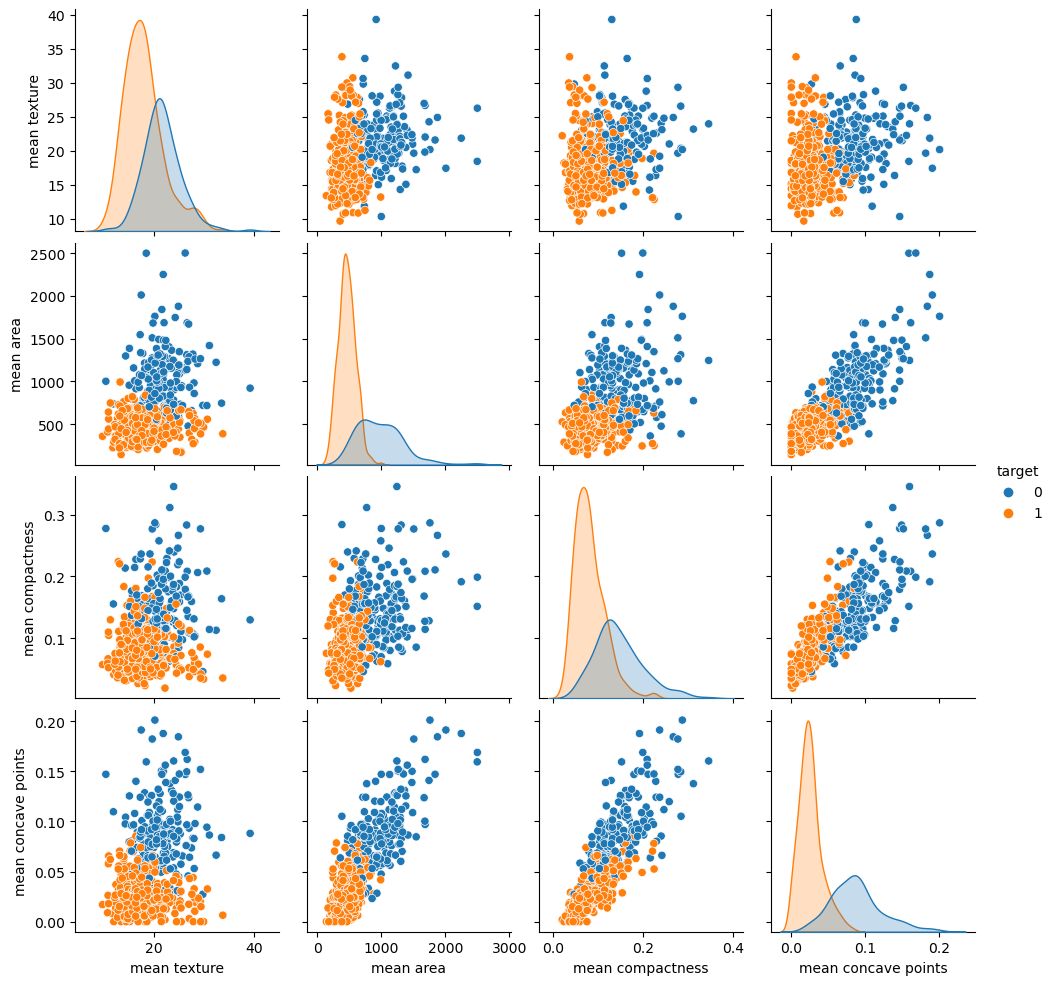

In [26]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
selecao = df.iloc[:, [1, 3, 5, 7, 30]]

sns.pairplot(selecao, hue="target")

Confusion Matrix 
 [[46  7]
 [ 5 85]]
Test set accuracy: 0.92
Train set accuracy: 1.00


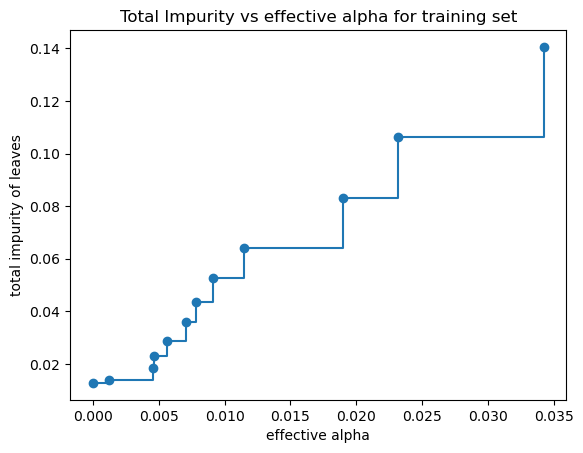

In [7]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_depth=5)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

confusion = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix \n {}".format(confusion))
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))
print("Train set accuracy: {:.2f}".format(knn.score(X_train, y_train)))

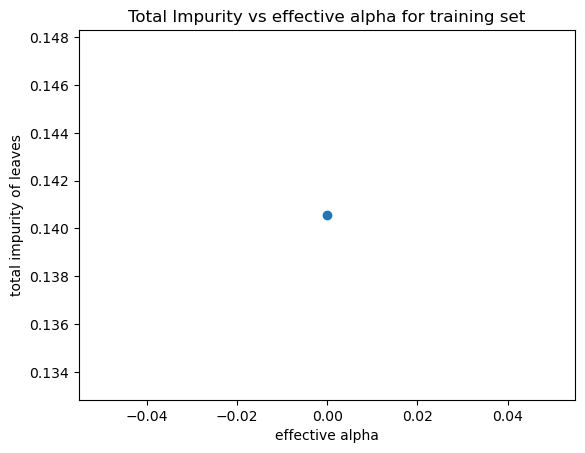

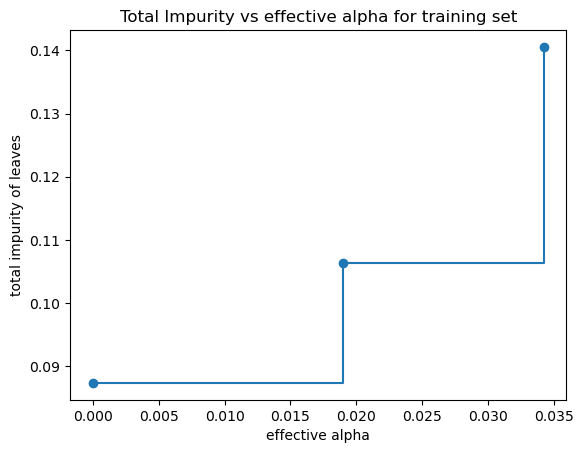

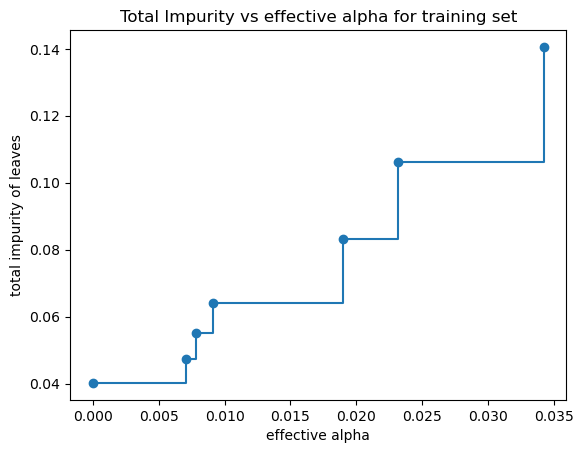

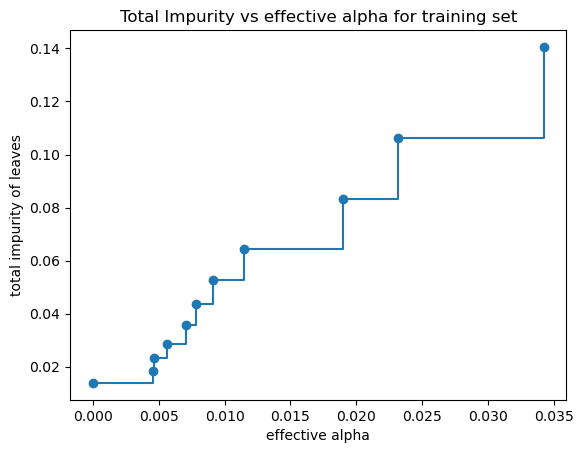

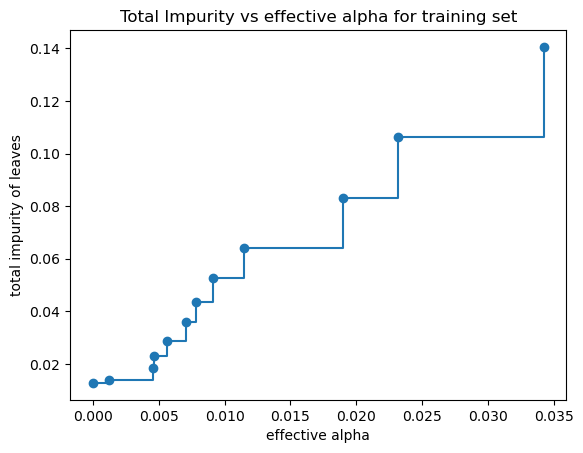

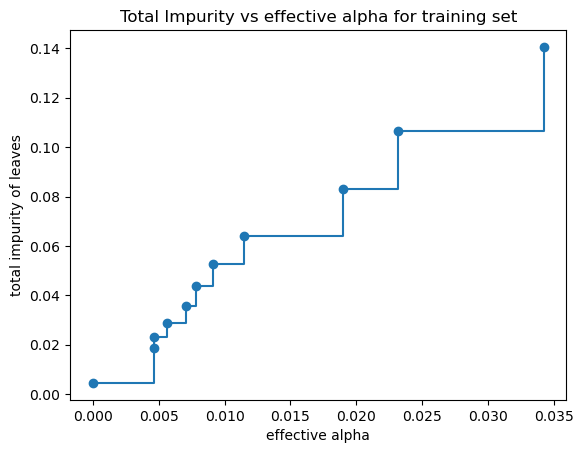

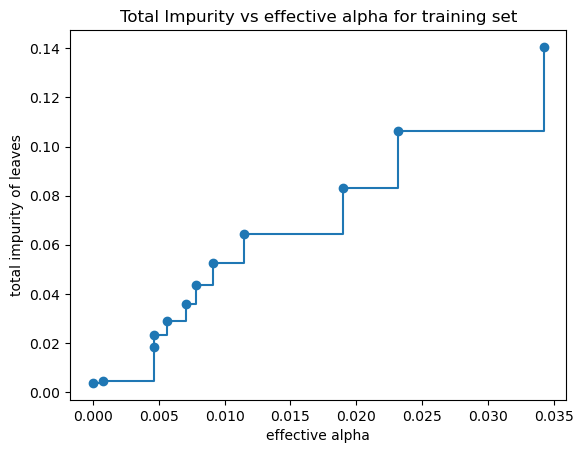

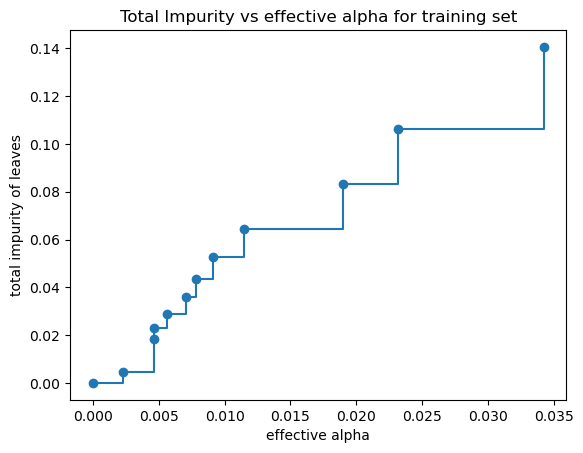

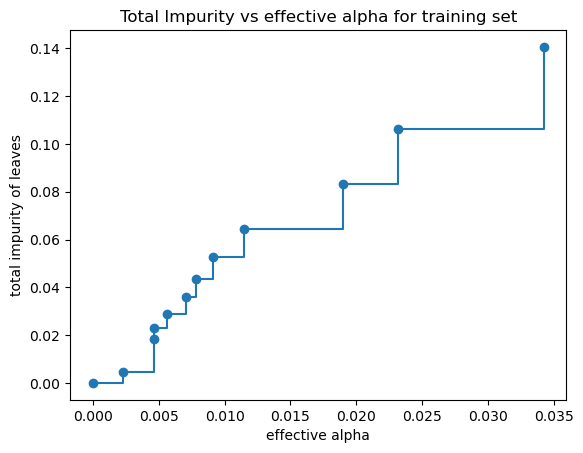

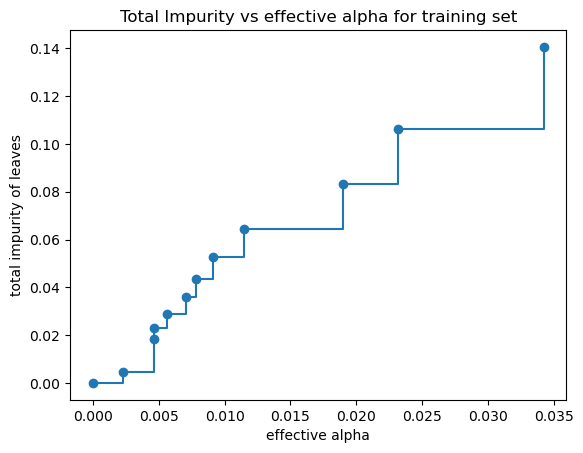

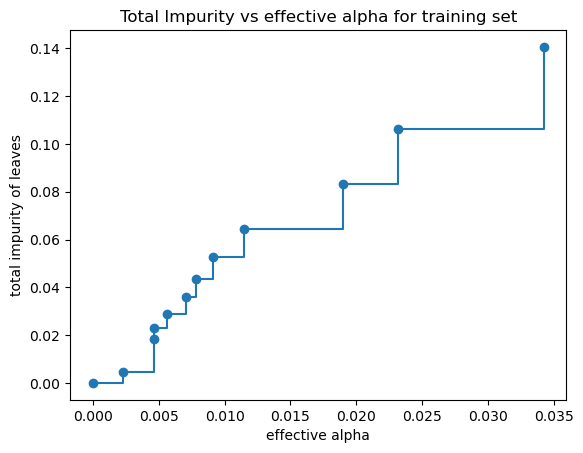

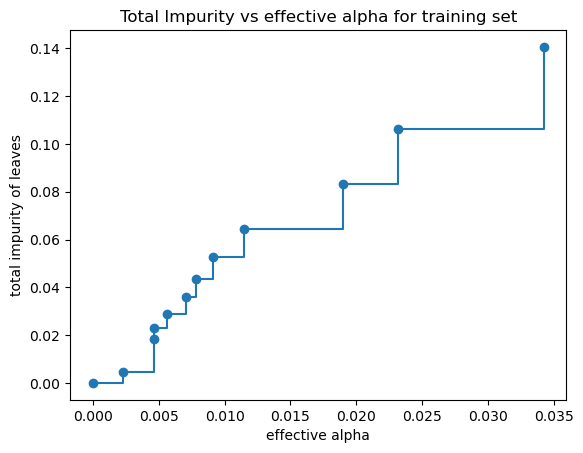

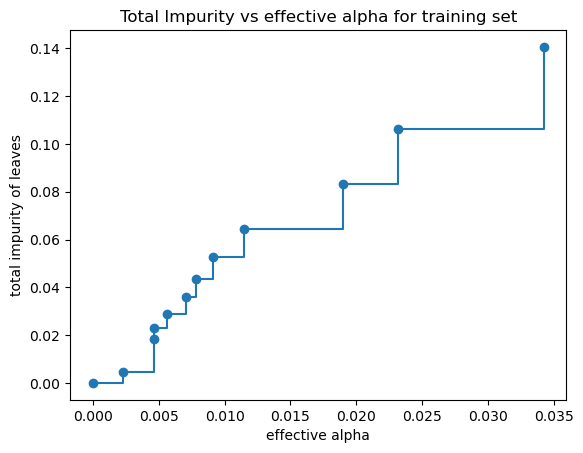

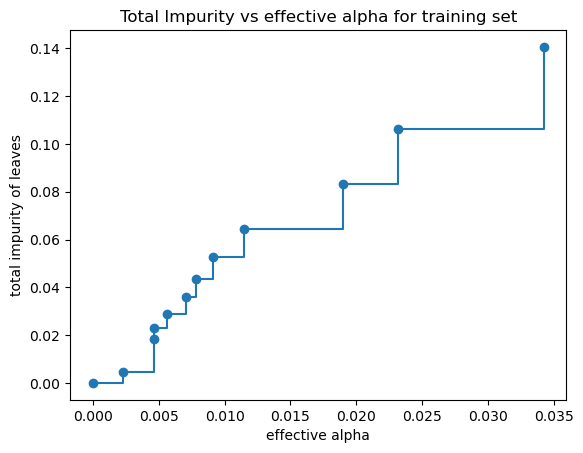

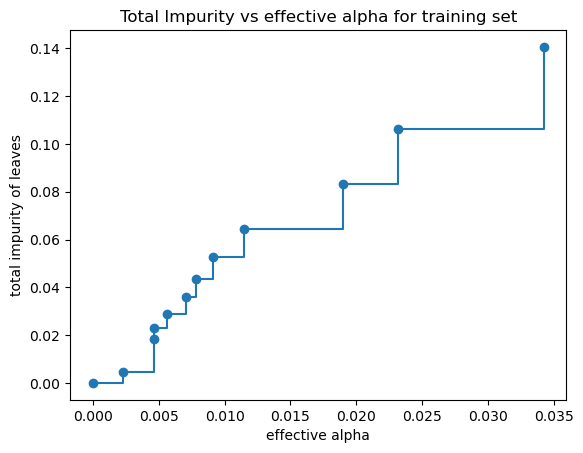

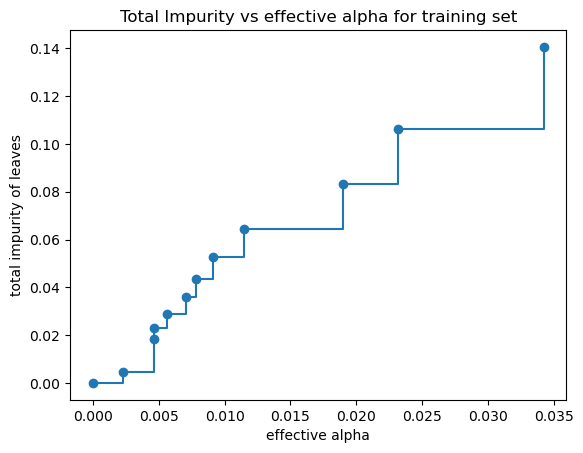

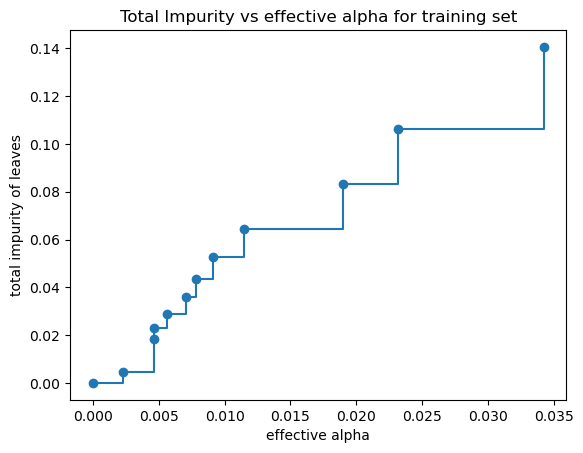

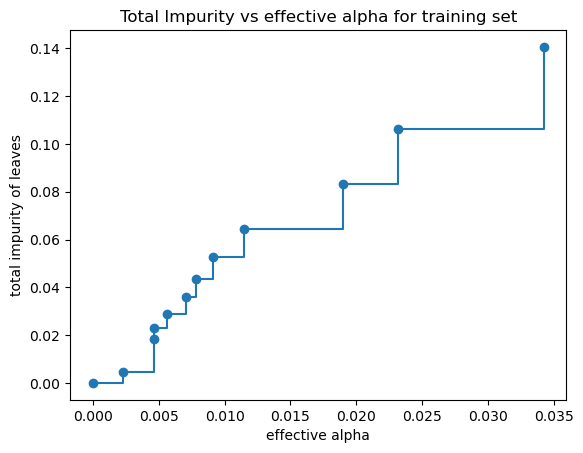

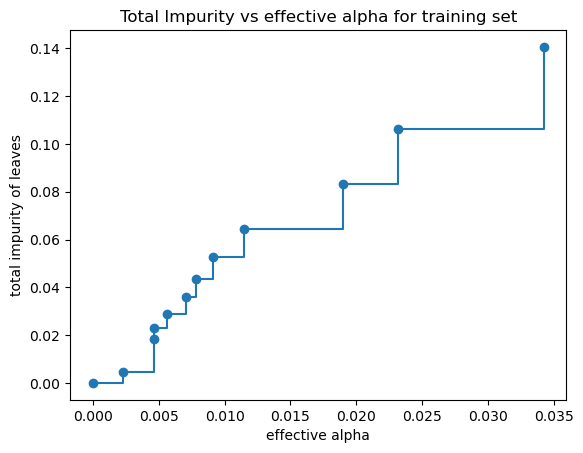

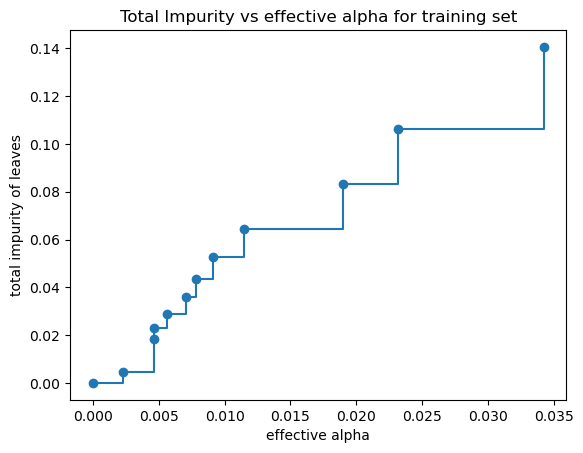

In [30]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

for i in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=i)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    fig, ax = plt.subplots()
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")